In [8]:
import os
import pandas
import numpy as np

path='/tsukimi/datasets/Chiba/baseline/datalist/val.csv'

# read csv
df = pandas.read_csv(path, header=None)
df.columns = ['path', 'label']
df['label']=df['label'].map(lambda x: x.split('&'))
label_map={}
# count labels
for label in df['label']:
    for l in label:
        if l in label_map:
            label_map[l]+=1
        else:
            label_map[l]=1

In [12]:
label_map

{'climbing_on_side': 147,
 'running': 1569,
 'restrainer_interaction': 1180,
 'unsupported_rearing': 162,
 'interaction_with_partner': 323,
 'immobility': 44,
 'idle_actions': 71}

In [14]:
1569/sum(label_map.values())

0.44879862700228834

In [2]:
path='/tsukimi/datasets/Chiba/cut_videos_2label'

import os
from collections import defaultdict
label_map=defaultdict(list)
# walk through all files
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.mov'):
            # parse filename
            label0=file.split('-')[0]
            label1=file.split('-')[1]
            file_path=os.path.join(root, file)
            label_map[label0].append(file_path)
            label_map[label1].append(file_path)

In [6]:
for key in label_map.keys():
    print(key, len(label_map[key]))

running 10463
restrainer_interaction 8071
interaction_with_partner 2049
immobility 324
unsupported_rearing 949
idle_actions 494
climbing_on_side 952


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2.2914162
-2.0293021


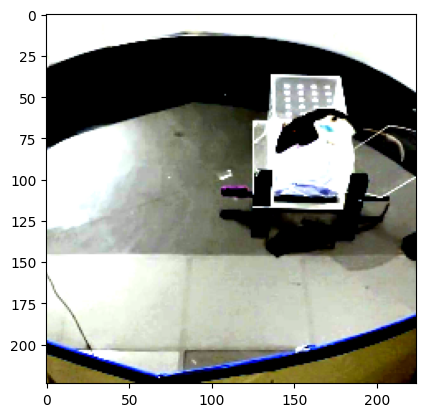

['restrainer_interaction&running', 'restrainer_interaction&running']
[2082, 2082]


In [34]:
import pickle
data_path='samples/sample_data.pkl'

# read data
with open(data_path, 'rb') as f:
    data=pickle.load(f)
# data[0][0].shape torch.Size([3, 16, 224, 224])
# show image data
import matplotlib.pyplot as plt
import torch
import numpy as np

# show image
def show_image(data):
    img=data.numpy()
    first_frame = img[:, 0, :, :]
    first_frame=np.transpose(first_frame, (1, 2, 0))
    # first_frame=first_frame* np.array([0.229, 0.224, 0.225])+np.array([0.485, 0.456, 0.406])
    print(first_frame.max())
    print(first_frame.min())
    plt.imshow(first_frame)
    plt.show()

show_image(data[0][0])
print(data[1])
print(data[2])